In [2]:
import cv2
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
images = glob.glob('../data/Nikon/1/*.JPG')
images.sort()
images

['../data/Nikon/1/DSC_1143.JPG',
 '../data/Nikon/1/DSC_1144.JPG',
 '../data/Nikon/1/DSC_1145.JPG',
 '../data/Nikon/1/DSC_1146.JPG',
 '../data/Nikon/1/DSC_1147.JPG',
 '../data/Nikon/1/DSC_1148.JPG',
 '../data/Nikon/1/DSC_1149.JPG',
 '../data/Nikon/1/DSC_1150.JPG',
 '../data/Nikon/1/DSC_1151.JPG',
 '../data/Nikon/1/DSC_1152.JPG',
 '../data/Nikon/1/DSC_1153.JPG',
 '../data/Nikon/1/DSC_1154.JPG',
 '../data/Nikon/1/DSC_1155.JPG',
 '../data/Nikon/1/DSC_1156.JPG',
 '../data/Nikon/1/DSC_1157.JPG',
 '../data/Nikon/1/DSC_1158.JPG',
 '../data/Nikon/1/DSC_1159.JPG',
 '../data/Nikon/1/DSC_1160.JPG',
 '../data/Nikon/1/DSC_1161.JPG',
 '../data/Nikon/1/DSC_1162.JPG',
 '../data/Nikon/1/DSC_1163.JPG',
 '../data/Nikon/1/DSC_1164.JPG',
 '../data/Nikon/1/DSC_1165.JPG',
 '../data/Nikon/1/DSC_1166.JPG',
 '../data/Nikon/1/DSC_1167.JPG',
 '../data/Nikon/1/DSC_1168.JPG',
 '../data/Nikon/1/DSC_1169.JPG',
 '../data/Nikon/1/DSC_1170.JPG',
 '../data/Nikon/1/DSC_1171.JPG',
 '../data/Nikon/1/DSC_1172.JPG',
 '../data/

In [53]:
img = cv2.imread(images[0], 0)

In [54]:
out = cv2.resize(img, (int(img.shape[1] / 4), int(img.shape[0] / 4)))

In [55]:
ret, corners = cv2.findChessboardCorners(img, (8,8))

In [56]:
print(corners)

[[[1884.1678   566.4466 ]]

 [[1888.6494   643.73334]]

 [[1893.0011   721.50165]]

 [[1897.7357   798.8255 ]]

 [[1902.2618   877.322  ]]

 [[1906.1576   955.2568 ]]

 [[1911.2668  1032.6003 ]]

 [[1915.6422  1110.7097 ]]

 [[1810.4375   569.0391 ]]

 [[1815.3989   647.48083]]

 [[1820.3832   724.59766]]

 [[1824.5215   803.4832 ]]

 [[1828.3557   882.3638 ]]

 [[1833.9661   960.5423 ]]

 [[1838.7622  1038.3391 ]]

 [[1842.5471  1117.342  ]]

 [[1736.4103   571.74664]]

 [[1742.3038   650.66345]]

 [[1745.8479   729.27405]]

 [[1750.3838   809.4202 ]]

 [[1755.8949   886.8694 ]]

 [[1759.3076   966.13635]]

 [[1764.8474  1043.5153 ]]

 [[1768.8676  1122.6852 ]]

 [[1662.023    576.4564 ]]

 [[1666.6616   653.6529 ]]

 [[1671.4677   734.26135]]

 [[1675.9814   812.31635]]

 [[1680.8726   891.71796]]

 [[1685.4868   970.4857 ]]

 [[1690.2743  1049.5846 ]]

 [[1694.526   1128.4242 ]]

 [[1587.4574   579.3146 ]]

 [[1591.657    658.08594]]

 [[1595.7317   737.41876]]

 [[1601.1097   816.7

In [ ]:
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((11*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:11].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
## images = glob.glob('*.jpg')
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (7,11), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (7,11), corners2, ret) cv.imshow('img', img)
        cv.waitKey(500)
cv.destroyAllWindows()

In [13]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [41]:
pattern_set = glob.glob('../data/TI/cd_11_15_2/*.jpg')
pattern_set.sort()

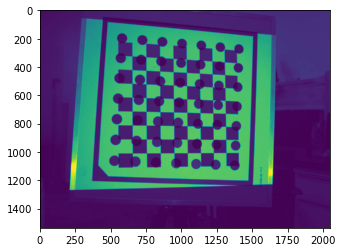

In [46]:
img = cv2.imread(pattern_set[2],0)
plt.imshow(img)
plt.show()

In [48]:
ret, corners = cv2.findCirclesGrid(img, (7, 7), cv2.CALIB_CB_SYMMETRIC_GRID)
if ret:
    vis = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    cv2.drawChessboardCorners(vis, (7,7), corners, ret)
    plt.imshow(vis)
    plt.show()
else:
    print("corner find failed!!!")

corner find failed!!!


In [50]:
scale_img = cv2.resize(img, (img.shape[1]//4, img.shape[0]//4))
scale_img = 255 - scale_img
ret, corners = cv2.findChessboardCorners(scale_img, (8, 8))
if ret:
    plt.imshow(scale_img)
    plt.show()
else:
    print("corner find failed")

corner find failed


In [52]:
def RemovePrinted_AddProjectBoard(projector_all_on, projector_all_off, board_image_print_and_project):
    albedo = np.empty_like(projector_all_on)
    out = np.empty_like(projector_all_on)
    all_on = projector_all_on.copy()
    all_off = projector_all_off.copy()
    combo = board_image_print_and_project.copy()

    rows, cols = projector_all_on.shape
    for yRow in range(rows):
        for xCol in range(cols):
            val_all_off = all_off[yRow, xCol]
            val_all_on = all_on[yRow, xCol]
            val_albedo = (val_all_on + val_all_off) / 2
            albedo[yRow, xCol] = val_albedo
    for yRow in range(rows):
        for xCol in range(cols):
            val_coded = combo[yRow, xCol]
            val_albedo = albedo[yRow, xCol]
            if val_coded > val_albedo or np.abs(val_coded-val_albedo) < 5:
                out[yRow, xCol] = 255
            else:
                out[yRow, xCol] = 0
    return out

In [53]:
projector_all_on = cv2.imread(pattern_set[0], 0)
projector_all_off = cv2.imread(pattern_set[1], 0)
board_image_print_and_project = cv2.imread(pattern_set[2], 0)


In [54]:
out = RemovePrinted_AddProjectBoard(projector_all_on, projector_all_off, board_image_print_and_project)

/Users/kainie/opt/anaconda3/envs/point_3d/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]
/Users/kainie/opt/anaconda3/envs/point_3d/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in ubyte_scalars


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/kainie/opt/anaconda3/envs/point_3d/lib/python3.7/tkinter/__init__.py", line 1705, in __call__
    return self.func(*args)
  File "/Users/kainie/opt/anaconda3/envs/point_3d/lib/python3.7/tkinter/__init__.py", line 749, in callit
    func(*args)
  File "/Users/kainie/opt/anaconda3/envs/point_3d/lib/python3.7/site-packages/matplotlib/backends/_backend_tk.py", line 270, in idle_draw
    self.draw()
  File "/Users/kainie/opt/anaconda3/envs/point_3d/lib/python3.7/site-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/Users/kainie/opt/anaconda3/envs/point_3d/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py", line 393, in draw
    self.figure.draw(self.renderer)
  File "/Users/kainie/opt/anaconda3/envs/point_3d/lib/python3.7/site-packages/matplotlib/backend_bases.py", line 1535, in _draw
    def _draw(renderer): raise Done(renderer)
matp

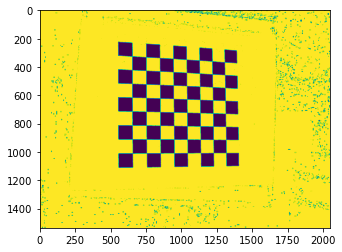

In [59]:
plt.imshow(out)

In [58]:
plt.show()